# Preliminary EDA and Data Prep for FBI NICS Data
> In this project, we will take a look at the state-by-state FBI National Instant Checks System (NICS) data which shows us the number of background checks performed by firearms sellers.

This project is divided into 3 separate notebooks, one for each section of our analysis:

<li>*Part 1:* FBI NICS Data and patterns within the guns data - observable changes over time, cyclical nature of permits.
<li>*Part 2:* Census data wrangling and cleaning and creation of a single dataset that can be used for Part 3.
<li>*Part 3:* A look at the relationship between variables in the census data and the normalized number of background checks - i.e. are there characteristics of a state’s demographics that appear to correlate to the number of background checks? This section will be performed for a subset of data from the NICS checks so we can compare it to the census data.


## Table of Contents
This sections of this notebook pertain to the FBI NICS dataset. 
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Cleaning + Building</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#appendix">Appendix - Background Research and References</a></li>
</ul>

<a id='intro'></a>
## Introduction

This section contains the basic imports and functions to be used in the rest of the notebook.

In [3]:
# Pagckages Import Section
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Looking at easier ways of converting strings to dates.
import timestring as ts
#da = ts.Date("2017-09")
% matplotlib inline


### Useful Functions Section
This section contains some functions that will be useful throughout the analysis.

In [4]:
def get_real_types(df):
    '''Input a pandas dataframe and get back a dictionary showing the 
    actual data types of each column - instead of <object> pointers.
    ** make sure you include from pprint import pprint
    
    '''

    # Create empty dictionary:
    types_list = {}
    # Create a list of the columns in df
    columns_list = df.columns.tolist()
    
    # For loop creates a key-value pair in the types_list dict with column name and the
    # data type of the value in the first row for that column

    for i in columns_list:
        types_list[i] = type(df[i].iloc[0])

    pprint(types_list)

    return(types_list)

<a id='wrangling'></a>
## Data Wrangling

This section contains the cells used to gather, asses and clean the FBI NICS Background Checks Data.

### General Properties - FBI NICS Background Checks Data: gun_data.csv

In [5]:
# Load your data and print out a few lines.
guns = pd.read_csv('gun_data.csv')
guns.fillna(value=0)

guns.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


>Wrangling: Look at the basic characteristics of the data:

In [6]:
guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [12]:
# Wrangling: Get the data types of object pointers:
get_real_types(guns)

{'Calc_Total': <class 'numpy.int64'>,
 'admin': <class 'numpy.int64'>,
 'handgun': <class 'numpy.int64'>,
 'long_gun': <class 'numpy.int64'>,
 'month': <class 'str'>,
 'multiple': <class 'numpy.int64'>,
 'other': <class 'numpy.int64'>,
 'permit': <class 'numpy.int64'>,
 'permit_recheck': <class 'numpy.int64'>,
 'prepawn_handgun': <class 'numpy.int64'>,
 'prepawn_long_gun': <class 'numpy.int64'>,
 'prepawn_other': <class 'numpy.int64'>,
 'private_sale_handgun': <class 'numpy.int64'>,
 'private_sale_long_gun': <class 'numpy.int64'>,
 'private_sale_other': <class 'numpy.int64'>,
 'redemption_handgun': <class 'numpy.int64'>,
 'redemption_long_gun': <class 'numpy.int64'>,
 'redemption_other': <class 'numpy.int64'>,
 'rentals_handgun': <class 'numpy.int64'>,
 'rentals_long_gun': <class 'numpy.int64'>,
 'return_to_seller_handgun': <class 'numpy.int64'>,
 'return_to_seller_long_gun': <class 'numpy.int64'>,
 'return_to_seller_other': <class 'numpy.int64'>,
 'returned_handgun': <class 'numpy.int

{'Calc_Total': numpy.int64,
 'admin': numpy.int64,
 'handgun': numpy.int64,
 'long_gun': numpy.int64,
 'month': str,
 'multiple': numpy.int64,
 'other': numpy.int64,
 'permit': numpy.int64,
 'permit_recheck': numpy.int64,
 'prepawn_handgun': numpy.int64,
 'prepawn_long_gun': numpy.int64,
 'prepawn_other': numpy.int64,
 'private_sale_handgun': numpy.int64,
 'private_sale_long_gun': numpy.int64,
 'private_sale_other': numpy.int64,
 'redemption_handgun': numpy.int64,
 'redemption_long_gun': numpy.int64,
 'redemption_other': numpy.int64,
 'rentals_handgun': numpy.int64,
 'rentals_long_gun': numpy.int64,
 'return_to_seller_handgun': numpy.int64,
 'return_to_seller_long_gun': numpy.int64,
 'return_to_seller_other': numpy.int64,
 'returned_handgun': numpy.int64,
 'returned_long_gun': numpy.int64,
 'returned_other': numpy.int64,
 'state': str,
 'totals': numpy.int64,
 'validate_total': numpy.int64}

In [13]:
# Wrangling: Basic statistical measures:
guns.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Calc_Total,validate_total
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,...,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.0
mean,6401.300441,102.727433,5931.364277,7798.960833,158.798078,268.603364,58.789588,4.076652,6.613696,0.067841,...,0.005767,3.289868,2.555707,0.226912,0.079696,0.097317,0.019143,21595.725911,21595.725911,0.0
std,23731.158830,2756.731662,8614.954626,9307.740581,913.339655,783.185073,604.262697,10.174706,15.395329,0.681467,...,0.173912,33.987054,25.908792,2.139596,0.663611,0.740136,0.186114,32591.418387,32591.418387,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,857.000000,2063.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000,4638.000000,0.0
50%,511.000000,0.000000,3046.000000,5114.000000,0.000000,125.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000,12399.000000,0.0
75%,4257.000000,0.000000,7277.000000,10374.000000,89.000000,301.000000,0.000000,3.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25453.000000,25453.000000,0.0
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000,541978.000000,0.0


##### Notes on the data so far:

It looks like the data types are mostly ok except for 'month'. We will probably want to convert this to a date format.

It is not surprising that columns have different numbers of missing values - background check laws are implemented differently in different states, so it is difficult to compare side by side.
http://graphics.wsj.com/gun-check-explainer/

Another interesting characteristic of this data is the relationship between columns - for example, columns about prepawn checks all pertain to a specific type of check. Also it is possible to look at the data by weapon type. We may consider creating variables for sub-lists of columns to make it easier to aggregate data on these dimensions.

##### Is the amount of data consistent across all states?
In this section we'll look at how much data we have for each state:

In [14]:
# See how many years of data we have for each state - to see if the dataset is consistent.

bystate = guns.groupby('state')
#bystate.count()

# There are 227 months for each state - so at least from a completeness perspective, the data are 
# consistent

> Before we proceed, let's get all the data into integer format:

In [15]:
# get a list of all the columns
guns_columns = guns.columns.tolist()
guns_columns_floats = guns_columns

guns_columns_floats.remove('month')
guns_columns_floats.remove('state')

print(guns_columns_floats)

# Make sure null values are replaced by 0:
guns[guns_columns_floats] = guns[guns_columns_floats].fillna(0.0).astype(int)
guns.info()

['permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'totals', 'Calc_Total', 'validate_total']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 29 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12485 non-null int64
permit_recheck               12485 non-null int64
handgun                      12485 non-null int64
long_gun                     12485 non-null int64
other                        12485 non-null int64
multiple                     12485 non-nul

Notes about this step - once I started doing some visualizations, I encountered problems with my total columns I created. After attempting to get rid of nulls in the data - which did not work - I decided to try converting the type to int (since the numbers we're dealing with are integers).

##### Is the 'totals' column a total of all the other columns or are there sub-aggregate columns in the data?

> Wrangling: Let's validate the Totals column in the data to make sure it is actually a total of all columns

In [16]:
# Loop to create the expression to sum the values in all the float columns:
expression_string = ''
count_cols = 0
for i in guns_columns_floats:
    expression_string += '+ guns["' + str(i) + '"]'
    count_cols = count_cols + 1
    
#print(expression_string)
#print(count_cols)
    
#Add a column to the table for the calculated total we can compare to the total in the table.
guns['Calc_Total'] = 0
guns['Calc_Total'] = guns["permit"]+ guns["permit_recheck"]+ guns["handgun"]+ guns["long_gun"]+ guns["other"]+ guns["multiple"]+ guns["admin"]+ guns["prepawn_handgun"]+ guns["prepawn_long_gun"]+ guns["prepawn_other"]+ guns["redemption_handgun"]+ guns["redemption_long_gun"]+ guns["redemption_other"]+ guns["returned_handgun"]+ guns["returned_long_gun"]+ guns["returned_other"]+ guns["rentals_handgun"]+ guns["rentals_long_gun"]+ guns["private_sale_handgun"]+ guns["private_sale_long_gun"]+ guns["private_sale_other"]+ guns["return_to_seller_handgun"]+ guns["return_to_seller_long_gun"]+ guns["return_to_seller_other"]
#guns['Calc_Total'] = guns["permit"]+ guns["permit_recheck"]+ guns["handgun"]+ guns["long_gun"]+ guns["other"]+ guns["multiple"]+ guns["admin"]+ guns["prepawn_handgun"]+ guns["prepawn_long_gun"]+ guns["prepawn_other"]+ guns["redemption_handgun"]+ guns["redemption_long_gun"]+ guns["redemption_other"]+ guns["returned_handgun"]+ guns["returned_long_gun"]+ guns["returned_other"]+ guns["rentals_handgun"]+ guns["rentals_long_gun"]+ guns["private_sale_handgun"]+ guns["private_sale_long_gun"]+ guns["private_sale_other"]+ guns["return_to_seller_handgun"]+ guns["return_to_seller_long_gun"]+ guns["return_to_seller_other"]
guns['validate_total'] = guns['Calc_Total'] - guns['totals']

guns.head()
guns.describe()
#guns.info()



,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Calc_Total,validate_total
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,...,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.0
mean,6401.300441,102.727433,5931.364277,7798.960833,158.798078,268.603364,58.789588,4.076652,6.613696,0.067841,...,0.005767,3.289868,2.555707,0.226912,0.079696,0.097317,0.019143,21595.725911,21595.725911,0.0
std,23731.158830,2756.731662,8614.954626,9307.740581,913.339655,783.185073,604.262697,10.174706,15.395329,0.681467,...,0.173912,33.987054,25.908792,2.139596,0.663611,0.740136,0.186114,32591.418387,32591.418387,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,857.000000,2063.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000,4638.000000,0.0
50%,511.000000,0.000000,3046.000000,5114.000000,0.000000,125.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000,12399.000000,0.0
75%,4257.000000,0.000000,7277.000000,10374.000000,89.000000,301.000000,0.000000,3.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25453.000000,25453.000000,0.0
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000,541978.000000,0.0


Conclusion - the total column in the table is in fact the sum of all the other type columns.

In [17]:
#We can remove the calculated total column:
del guns['Calc_Total']
del guns['validate_total']

<a id='cleaning'></a>
## Cleaning + Building

This section contains the cells used to explore and augment the FBI NICS Background Checks Data.

Based on what we learned in the wrangling phase, the below is a to-do list for this section:

* Add columns to the data: month (in date format), year and month (for aggregating)
* Basic visaulizations
* Create a simplified dataset to be used for analysis against variables in the Census data.


### Adding some useful columns

We will do the following to the dataset:
1. Add a column for the date that's in a date format.
2. Add a column for the year (to be used for aggregating).

In [18]:
#Add a column called d_month that will be the month value formatted as a date.
guns['d_month'] = pd.to_datetime(guns['month'])
# Add columns for year and month - could use these as categoricals later.
guns['year'] = guns.month.str[:4]
guns['month_only'] = guns.month.str[-2:]
guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,d_month,year,month_only
0,2017-09,Alabama,16717,0,5734,6320,221,317,0,15,...,9,16,3,0,0,3,32019,2017-09-01,2017,09
1,2017-09,Alaska,209,2,2320,2930,219,160,0,5,...,17,24,1,0,0,0,6303,2017-09-01,2017,09
2,2017-09,Arizona,5069,382,11063,7946,920,631,0,13,...,38,12,2,0,0,0,28394,2017-09-01,2017,09
3,2017-09,Arkansas,2935,632,4347,6063,165,366,51,12,...,13,23,0,0,2,1,17747,2017-09-01,2017,09
4,2017-09,California,57839,0,37165,24581,2984,0,0,0,...,0,0,0,0,0,0,123506,2017-09-01,2017,09


### Creating simplified datasets for analysis

We will do the following to the dataset:
1. Create a new dataset that aggregates numbers based on firearm type to be used to look at patterns in the NICS data.
2. Create a new dataset based on this new dataset re-arranged and filtered that will be used to analyze relationships to Census data.

In [19]:
# Create the new dataframe working copy:
working_copy = guns.copy()

#Create columns that aggregate the numbers by type of NICS Check:
#This will enable us to look at permit type as a categorical variable and we can get rid of columns
working_copy['handguns_total'] = guns["returned_handgun"]+ guns["handgun"]+ guns["prepawn_handgun"]+ guns["redemption_handgun"]+ guns["rentals_handgun"]+ guns["private_sale_handgun"]+ guns["return_to_seller_handgun"]
working_copy['long_guns_total'] = guns["returned_long_gun"]+ guns["long_gun"]+ guns["prepawn_long_gun"]+ guns["redemption_long_gun"]+ guns["rentals_long_gun"]+ guns["private_sale_long_gun"]+ guns["return_to_seller_long_gun"]
working_copy['other_total'] = guns["returned_other"] + guns["permit"]+ guns["permit_recheck"]+ guns["other"]+ guns["multiple"]+ guns["admin"]+ guns["prepawn_other"]+ guns["redemption_other"]+ guns["return_to_seller_other"] + guns["private_sale_other"] 

#Double-check that the sum of the 3 aggregate columns still adds up to the totals column:
working_copy['Calc_Total'] = working_copy['handguns_total']+working_copy['long_guns_total']+working_copy['other_total']

#working_copy['year'] = working_copy['year'].astype('int')
working_copy.head()
working_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 34 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12485 non-null int64
permit_recheck               12485 non-null int64
handgun                      12485 non-null int64
long_gun                     12485 non-null int64
other                        12485 non-null int64
multiple                     12485 non-null int64
admin                        12485 non-null int64
prepawn_handgun              12485 non-null int64
prepawn_long_gun             12485 non-null int64
prepawn_other                12485 non-null int64
redemption_handgun           12485 non-null int64
redemption_long_gun          12485 non-null int64
redemption_other             12485 non-null int64
returned_handgun             12485 non-null int64
returned_long_gun            12485 non-null int64
returned_other               12485 non-

> Create a working copy that only contains the columns we'll use in our EDA:


In [20]:
w_copy_raw = working_copy[['state', 'd_month', 'year', 'month_only', 'month', 'totals', 'handguns_total', 'long_guns_total', 'other_total']].copy()


#export the summary dataframe to a csv for later use:
w_copy_raw.to_csv('summary.csv', index=False)
#w_copy_raw.head()

> Now we'll reearrange the data so we have a summary file aggregated by state and year

In [21]:
#2 - rearrange the data so we have a summary file aggregated by state and year.
summary_by_year = w_copy_raw[['state', 'year', 'month_only', 'totals']]
summary_by_year_final = pd.pivot_table(summary_by_year, values=['totals'], index=['state'], columns=['year'], aggfunc=np.sum)

# export the summary_by_year dataframe to a csv for later use:
summary_by_year_final.to_csv('summary_by_year_final.csv', index=False)

summary_by_year_final.head()

totals                                                          \
year         1998    1999    2000    2001    2002    2003    2004    2005   
state                                                                       
Alabama     36568  246756  221911  230187  221008  225479  229997  235873   
Alaska       3985   43073   39959   39959   36793   37059   40504   44514   
Arizona     17453  173548  148263  147582  142260  145719  155719  176649   
Arkansas    21752  184616  169628  166062  153424  150249  158366  164001   
California  67445  883144  794506  854569  684390  524431  548843  611022   

                                                                              \
year          2006    2007    2008    2009    2010    2011     2012     2013   
state                                                                          
Alabama     243176  245355  299432  317868  308607  336102   431356   563880   
Alaska       47037   49604   61729   60780   65909   70198    85342    93405   
Arizona     204178  192071  208721  215379  206050  251477   339663   363036   
Arkansas    170129  169824  191799  209842  191448  206228   246193   279736   
California  617820  855943  780398  788164  816399  905701  1132603  1368295   

                                                
year           2014     2015     2016     2017  
state                                           
Alabama      621305   737509   616947   336763  
Alaska        87623    85621    87647    56902  
Arizona      310672   331442   416279   279553  
Arkansas     234282   257346   266014   161694  
California  1474616  1761079  2377167  1167528

> Now we will create a dataframe that summarizes the totals by d_month - we'll use this to visualize the data over time

In [22]:

summary_by_month = w_copy_raw[['d_month','totals', 'handguns_total', 'long_guns_total', 'other_total']].copy()

summary_by_month_final = pd.DataFrame(summary_by_month.groupby('d_month').sum())

summary_by_month_final.info()
summary_by_month_final.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 227 entries, 1998-11-01 to 2017-09-01
Data columns (total 4 columns):
totals             227 non-null int64
handguns_total     227 non-null int64
long_guns_total    227 non-null int64
other_total        227 non-null int64
dtypes: int64(4)
memory usage: 8.9 KB


,totals,handguns_total,long_guns_total,other_total
d_month,,,,
1998-11-01,21176,6859,11909,2408
1998-12-01,870722,213140,570882,86700
1999-01-01,585974,184496,309915,91563
1999-02-01,690215,232448,352411,105356
1999-03-01,741687,241036,376775,123876


> create the NICS dataset we will eventually merge with the relevant census data for part 2 of our analysis.

In [27]:

# Filter the data for 2011 onward:
working_copy_recent = w_copy_raw[w_copy_raw['d_month']>'2010-12-01']

#working_copy_recent.head()
working_copy_recent.info()

nics_merge = working_copy_recent[['state', 'd_month', 'year', 'month_only', 'totals', 'handguns_total', 'long_guns_total', 'other_total']]
nics_merge.head()
#nics_merge.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 0 to 4454
Data columns (total 9 columns):
state              4455 non-null object
d_month            4455 non-null datetime64[ns]
year               4455 non-null object
month_only         4455 non-null object
month              4455 non-null object
totals             4455 non-null int64
handguns_total     4455 non-null int64
long_guns_total    4455 non-null int64
other_total        4455 non-null int64
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 348.0+ KB


,state,d_month,year,month_only,totals,handguns_total,long_guns_total,other_total
0,Alabama,2017-09-01,2017,09,32019,7136,7619,17264
1,Alaska,2017-09-01,2017,09,6303,2570,3140,593
2,Arizona,2017-09-01,2017,09,28394,12670,8717,7007
3,Arkansas,2017-09-01,2017,09,17747,5668,7925,4154
4,California,2017-09-01,2017,09,123506,37700,24978,60828


> Use pivot table to reshape the nics_merge dataframe so it will give us the columns we need

In [28]:
final_nics = pd.pivot_table(nics_merge, index=['state'], aggfunc=np.sum)
# Drop the Fact column if it's in there
try:
    final_nics.drop('year', axis = 1, inplace=True)
except ValueError:
    pass

final_nics.head()
#final_nics.to_csv('final_nics.csv', index=True)
#Now we have a csv file we can use when we're ready to merge the census dataset with NICS data.

,handguns_total,long_guns_total,other_total,totals
state,,,,
Alabama,1304551,1206764,1132547,3643862
Alaska,252654,271035,43049,566738
Arizona,1047231,719682,525209,2292122
Arkansas,550351,722851,378291,1651493
California,3037359,2789588,4360042,10186989


<a id='eda'></a>
## Exploratory Data Analysis - Part 1

> In this section, we'll take a look at the basic character of the NICS data to get a feel for which research questions to look at in EDA part 2 (which will include selected variables from the Census data.

### What does the NICS data look like? Are there patterns in the data?
1. Is the usage of NICS increasing over time?
2. What time of year do people buy firearms?
3. How do states compare to one another?

#### 1. Is the usage of NICS increasing over time?
In order to get a feel for what the data looks like overall, we'll perform some high-level summary visualizations.
1. A heatmap will allow us too look at total NICS checks over time as well as by month.

Text(0.5,34,'Month')

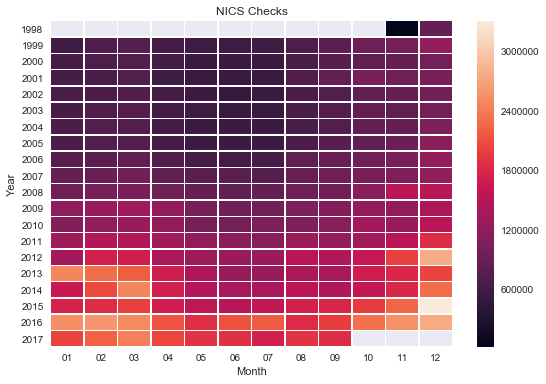

In [30]:
# Seaborn has a robust heatmap we could use!
sns.set()
# Create a pivot table of the data that the heatmap can use:
#Prep the data:
summary = w_copy_raw[['year', 'month_only', 'totals']]

hm_summary = pd.pivot_table(summary, values='totals', index=['year'], columns=['month_only'], aggfunc=np.sum)

# Draw a heatmap without the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(hm_summary, annot=False, fmt="f", linewidths=.5, ax=ax).set_title("NICS Checks")
ax.set_ylabel("Year")
ax.set_xlabel("Month")

#### Observations About NICS Usage Overall From Our Heatmap:

1. Yes, the usage of NICS is clearly increasing consistently over time. We must be careful how we interpret this increase. While the media frequently use the numbers of NICS checks as a proxy for gun sales, we need to note that a NICS check is valid for 30 days, so one check could result in multiple purchases. Also, because private sales don't necessarily require a NICS check, there could be an increase in purchases not reflected in the NICS data. 
2. Yes, there is a fairly cyclical nature to NICS checks during the year. Summer months show lower activity and November - March show higher activity. Most notably, December seems to be the month when the most NICS checks get done. Do people buy firearms as Christmas Presents?

Lets add in a couple more basic visualizations to get a better look at this data:


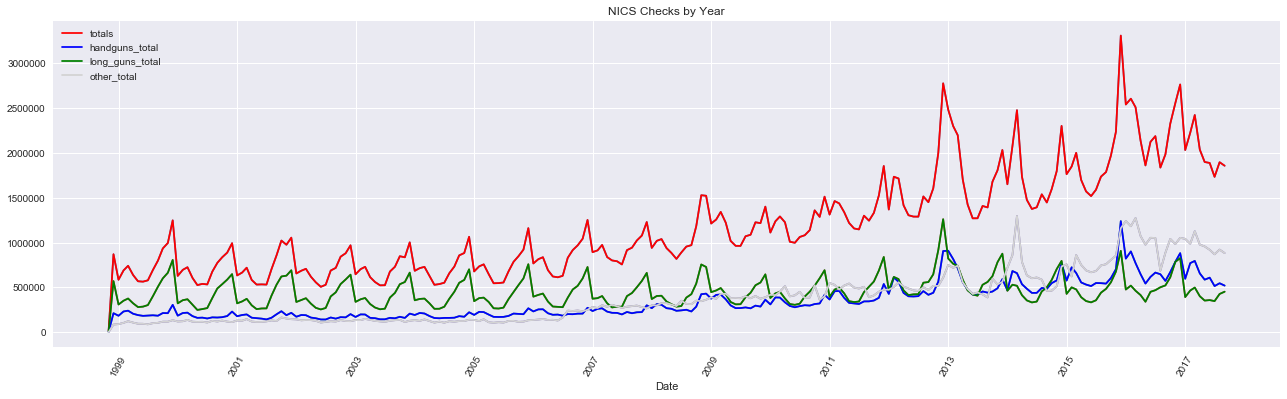

In [601]:
#Show the totals over time:

#Prep the data:
t = summary_by_month_final['totals']
h = summary_by_month_final['handguns_total']
l = summary_by_month_final['long_guns_total']
o = summary_by_month_final['other_total']
#Plot the data:
sns.color_palette('deep', 12)
plt.subplots(figsize=(22, 6))
plt.plot(summary_by_month_final)
plt.plot(t, 'red')
plt.plot(h, 'blue')
plt.plot(l, 'green')
plt.plot(o, 'lightgrey')
plt.xlabel('Date')
plt.title('NICS Checks by Year')
plt.legend(loc='best')
plt.xticks(rotation=60)
plt.show()


### Observations:

Overall, we can see that there has been an increase in the total number of NICS checks. However, this was pretty gradual until about 2009 where the increase picks up considerably.
What is interesting is long guns don't seem to be showing much of a change in the last 15 years, but handguns (and other) are a different story.

This graph raises more questions as well:

1. There are a few specific points where we see unusually large spikes. After doing some desk research on this, we'll re-create this graph with some points annotated. See sources at the end of this notebook for links to research.

2. There is clearly a yearly cyclical pattern here - what time of year are people purchasing guns?

3. The patterns for handguns were fairly stable until 2013 and have since shown much more variability. It would be nice to look into this question too, but it is beyond the scope of this analysis. 


#### What happened around the time of the spikes?
In this section we'll recreate the latest few years of this plot so we can see the spikes and annotate them:
First, we'll gather the 5 highest points in the graph and then look online for events around those dates that might influence gun sales:

In [32]:
#Lets take a look at the 5 highest points in the graph:

top_vals = pd.DataFrame(summary_by_month_final.nlargest(5, 'totals'))

# Create lists of the top values we will use for the annotation coordinates:
dates = top_vals.index.values
print(dates)
points = list(top_vals['totals'])
print(points)

# Create an additional list of strings we will use to label the points in the graph. 
# I manually looked up significant events around those dates

texts = ['a call from President Obama to limit assault weapons after the shooting in San Bernardino, Calif.',
        'Sandy Hook Massacre', 'Mass shooting in Kansas factory', 'Trump elected', '???']



['2015-12-01T00:00:00.000000000' '2012-12-01T00:00:00.000000000'
 '2016-12-01T00:00:00.000000000' '2016-02-01T00:00:00.000000000'
 '2016-11-01T00:00:00.000000000']
[3308199, 2776105, 2763115, 2604667, 2554486]


> Now we can re-create the plot, filtered by date and add in the annotations we created in the previous cell.

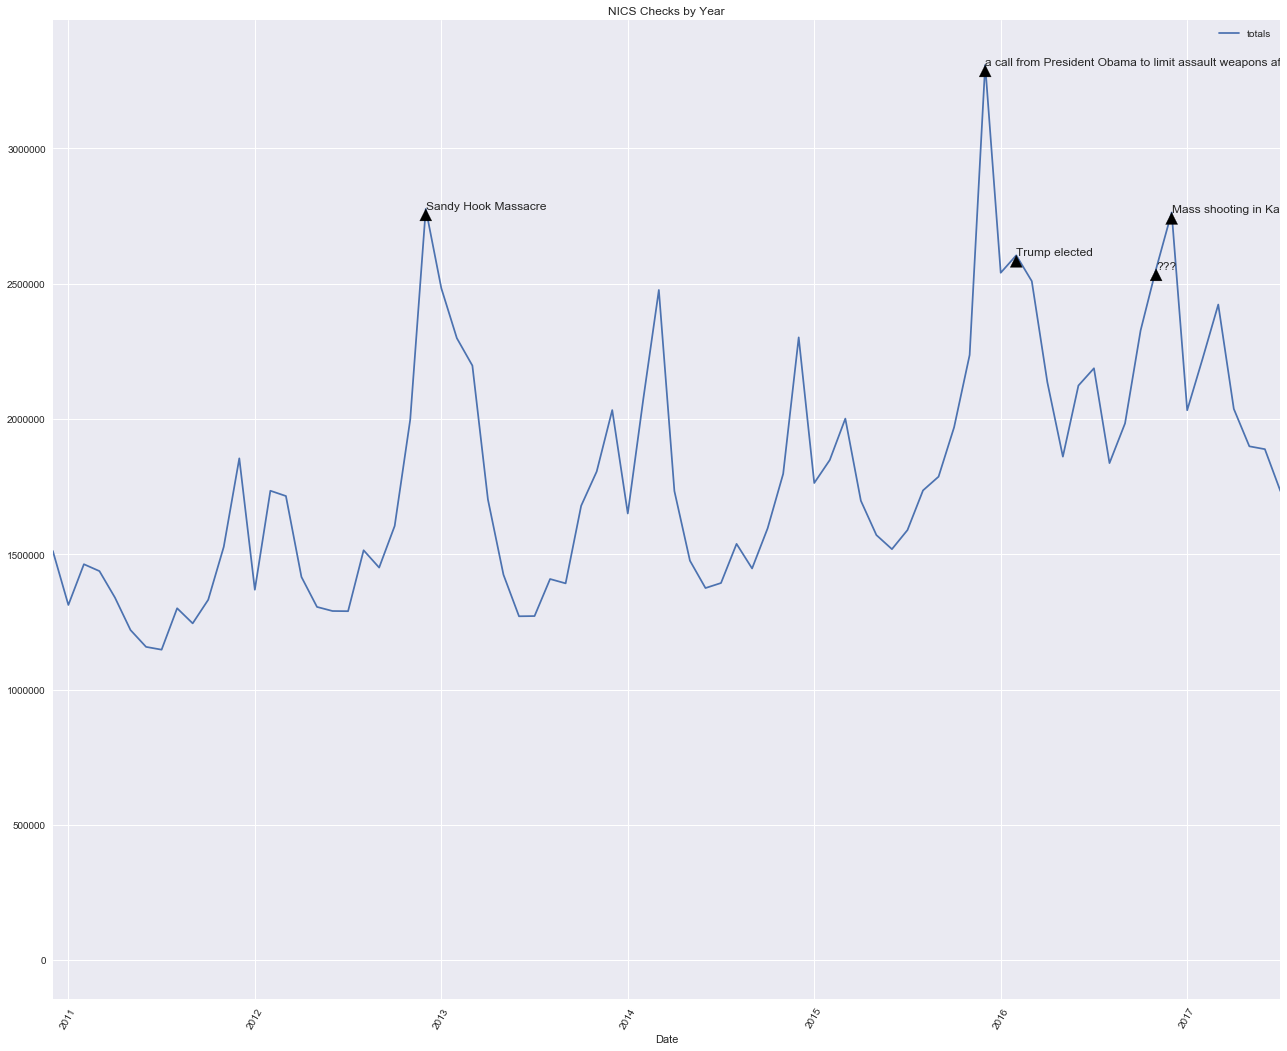

In [33]:
# Recreate the plot for the last few years:

t = summary_by_month_final['totals']

#Plot the data:
sns.color_palette('deep', 12)
plt.subplots(figsize=(22, 18))

ax = t.plot()
ax.set_xlim(pd.Timestamp('2010-12-31'), pd.Timestamp('2017-07-01'))
plt.xlabel('Date')
plt.title('NICS Checks by Year')
plt.legend(loc='best')
plt.xticks(rotation=60)

# Annotate the figure:
i = 0
for i in points:
    ycoord = i
    xcoord = dates[points.index(i)]
    disp = str(xcoord)[0:10]
    tip = texts[points.index(i)]
    #print(xcoord, ycoord, disp)
    plt.annotate(tip, xy=(disp, ycoord),arrowprops=dict(facecolor='black'), clip_on=True)

    i = i + 1


plt.show()

#### What happened around the time of the spikes? Observations:

Spikes appear to occur for a few reasons:

1. Presidential elections seem to further accentuate the end-of-year spike.

2. The data support the comment seen often in my desk research: spikes in gun sales occur after a mass shooting. This is likely because of calls for better gun control laws that also follow mass shootings.

#### There is clearly a yearly cyclical pattern here - what time of year are people purchasing guns?
Below we'll take a closer look at what times of year we see the highest levels of NICS Checks.

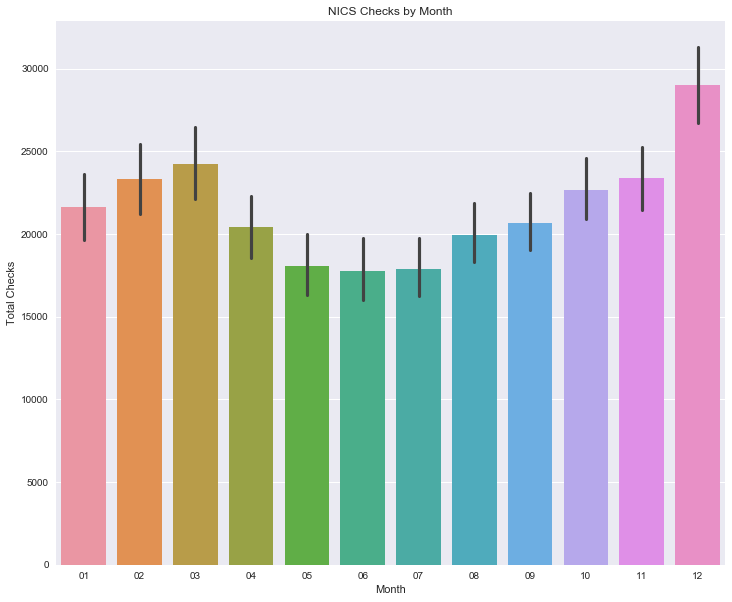

In [38]:
# Show a bar plot of totals over time by MONTH of YEAR:
x = summary['month_only']
y = summary['totals']
# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(12, 10))
#f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
sns.barplot(x, y, ax=ax1)
#sns.axes_style()
ax1.set_ylabel("Total Checks")
ax1.set_xlabel("Month")
plt.title('NICS Checks by Month')
plt.legend(loc='lower right')


#### Cyclical Nature of Checks: Observations:
This bar plot also confirms the patterns we saw in the two prior charts:

1. November/December shopping season - this is the highest sales for many retail items, so it appears firearms also go on sale on Black Friday and that people also buy them as gifts. 
> Interesting note: NICS checks are performed on the purchaser of the weapon. So if it is a gift, the background check may not ever be performed on the owner of the gun.

### Which states have the highest and lowest usage of NICS in the last 5 years?
Look at a state-by-state comparison of NICS checks to see if there are any relevant characteristics we want to consider before we do part 2 of the analysis.

> We'll filter the data first so we're only looking at the last 5 years:

In [39]:
# Filter the data:
NICS_sum = w_copy_raw[w_copy_raw['year']>'2010']
NICS_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 0 to 4454
Data columns (total 9 columns):
state              4455 non-null object
d_month            4455 non-null datetime64[ns]
year               4455 non-null object
month_only         4455 non-null object
month              4455 non-null object
totals             4455 non-null int64
handguns_total     4455 non-null int64
long_guns_total    4455 non-null int64
other_total        4455 non-null int64
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 348.0+ KB


> Create a bar plot showing the totals for each state:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

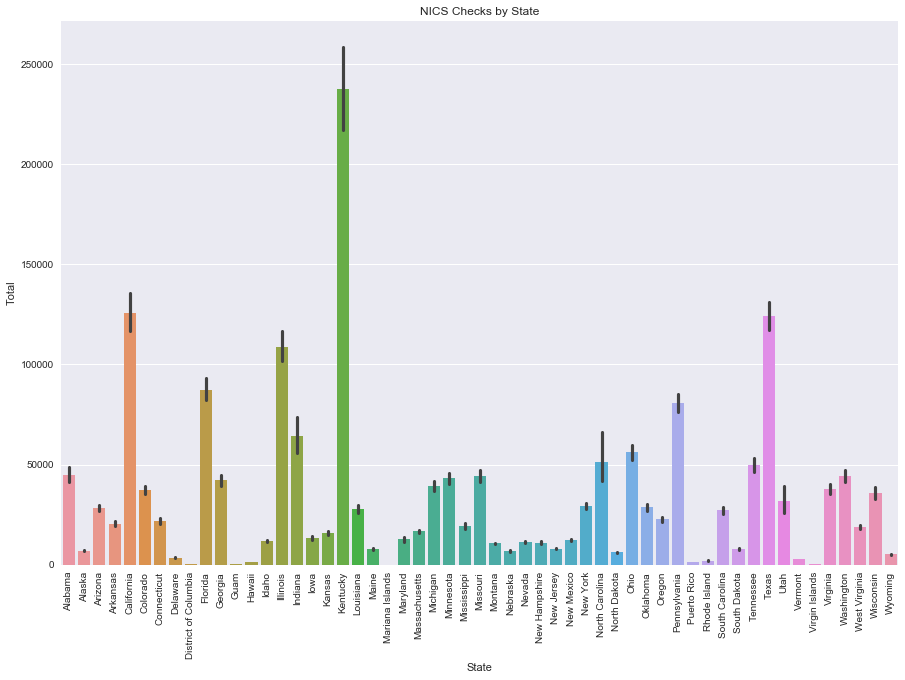

In [40]:
# Create a barplot showing state totals:

st = NICS_sum['state']
to = NICS_sum['totals']
plt.subplots(figsize=(15, 10))

sns.barplot(x=st, y=to, data=NICS_sum)

plt.xlabel('State')
plt.ylabel('Total')
plt.title('NICS Checks by State')
plt.xticks(rotation=90)


### Observations

While there is a lot of variability from state to state, it's not a good idea to compare state totals side-by-side as state populations vary enormously. In the analysis notebook, we'll look at the per-capita totals, which is a more sensible comparison.

What is notable is the state of Kentucky - we may want to exclude it from the data as it is clearly very different from the others and may make it difficult to to visualize variable relationships.

<a id='conclusions'></a>
## Conclusions

For this initial phase of the analysis, we can see a few interesting characteristics of the data:

1. Total usage of the NICS system has increased significantly since around 2012. Before then, the pattern of usage of NICS was fairly stable.
2. Purchases of handguns are changing more rapidly than the other types of guns/permits. This is noteworthy as handguns are used only for sport or killing people (not hunting).
3. There is a lot of variability in the totals from state to state - this is not unexpected, since state populations also vary widely. However Kentucky is an outlier and will be removed from the phase 2 analysis.
4. It appears that people buy firearms as Christmas presents. 

In the next notebook, we'll look at the Cenus data and use the datasets created in this notebook to create a dataset normalized for state populations and that allows us to explore which census and political characteristics of states appear to be related to the usage of NICS background checks.

<a id='appendix'></a>
## Appendix

> Background Research and References:

The Times looked at the data set and found some interesting patterns - namely that when gun control legislation is proposed, people run out and buy guns:
https://www.nytimes.com/interactive/2015/12/10/us/gun-sales-terrorism-obama-restrictions.html

The GitHub link to the data:
https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md

NICS Participation Map:
https://www.fbi.gov/file-repository/nics-participation-map.pdf/view
Important - the states participate at different levels, so it’s hard to make state-to-state comparisons. Some states put their own Brady procedures in place and don’t use the FBI, others use the FBI for certain permits, not others.

ALSO IMPORTANT: Harvard study - only about 40% of gun sales involve any kind of background check (private sales it is not required).
https://www.thetrace.org/2015/10/private-sale-loophole-background-check-harvard-research/


Aaron Carroll (Healthcare Triage) - research on firearms as a public health issue:
https://theincidentaleconomist.com/wordpress/healthcare-triage-a-brief-history-of-guns-in-america-guns-and-public-health-part-1/

How the NICS Check works:
http://graphics.wsj.com/gun-check-explainer/


Gun deaths:
https://fivethirtyeight.com/features/gun-deaths-about/

How the NICS Check works:
http://graphics.wsj.com/gun-check-explainer/

Scorecard: 

http://gunlawscorecard.org/


> More Questions:
1. What's with Kentucky?
2. What else might have caused the spikes observed in this data?
3. Is the NICS data a decent proxy for actual firearms sales?


